In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
data = pd.read_csv("/home/csl-4/Downloads/BostonHousing.csv")
data.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [48]:
# Shape
data.shape

(506, 14)

In [49]:
# Column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [50]:
# Statistics
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [68]:
# Check if data has any null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [52]:
X = data[['rm']]   # Feature
y = data['medv']   # Target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (404, 1)
Testing samples: (102, 1)


In [69]:

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [55]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: -36.24631889813795
Coefficient: 9.348301406497727


In [56]:
y_pred = model.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
mse

46.144775347317264

In [58]:
rmse = np.sqrt(mse)
rmse

6.792994578778734

In [59]:
r2 = r2_score(y_test, y_pred)
r2

0.3707569232254778

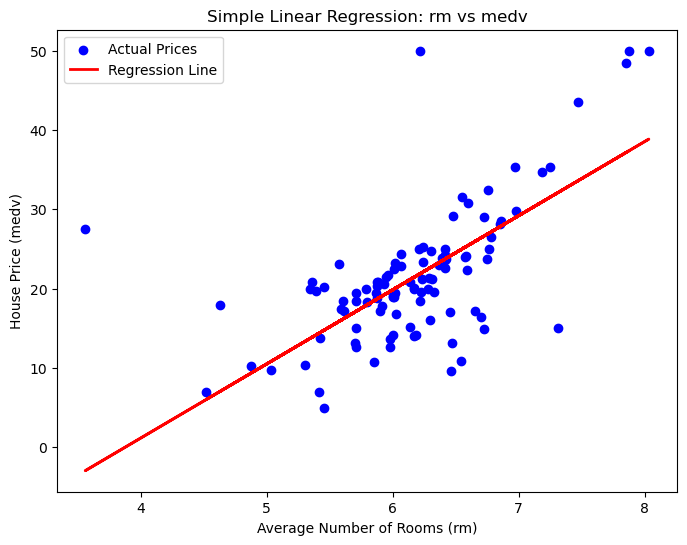

In [60]:
plt.figure(figsize=(8,6))

plt.scatter(X_test['rm'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['rm'], y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("House Price (medv)")
plt.title("Simple Linear Regression: rm vs medv")
plt.legend()
plt.show()


In [61]:
print(X_test.shape)
print(X_test['rm'].shape)

(102, 1)
(102,)


In [62]:
# Multiple Linear Rgression

In [63]:
X = data[['crim', 'rm', 'age', 'tax']]  # Features
y = data['medv']  # Target: House price (MEDV)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (404, 4)
Testing samples: (102, 4)


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Display model intercept and coefficients
print("Intercept:", model.intercept_)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

Intercept: -22.266152481352947


,Feature,Coefficient
0,crim,-0.135404
1,rm,8.137953
2,age,-0.028701
3,tax,-0.009602


In [67]:
y_pred = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 37.60632590059015


In [44]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.132399685326304


In [45]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.4871896105731396


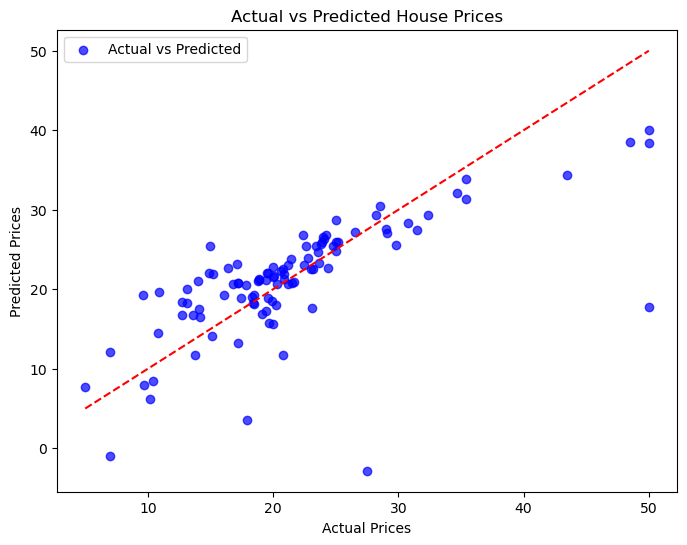

In [46]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

In [70]:
# Changes

In [71]:
X = data[['lstat']]   # Feature
y = data['medv']   # Target

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (404, 1)
Testing samples: (102, 1)


In [73]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [74]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 34.8369498203185
Coefficient: -0.9665309019503525


In [75]:
y_pred = model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
mse

33.51954917268488

In [77]:
rmse = np.sqrt(mse)
rmse

5.789606996393182

In [78]:
r2 = r2_score(y_test, y_pred)
r2

0.5429180422970386

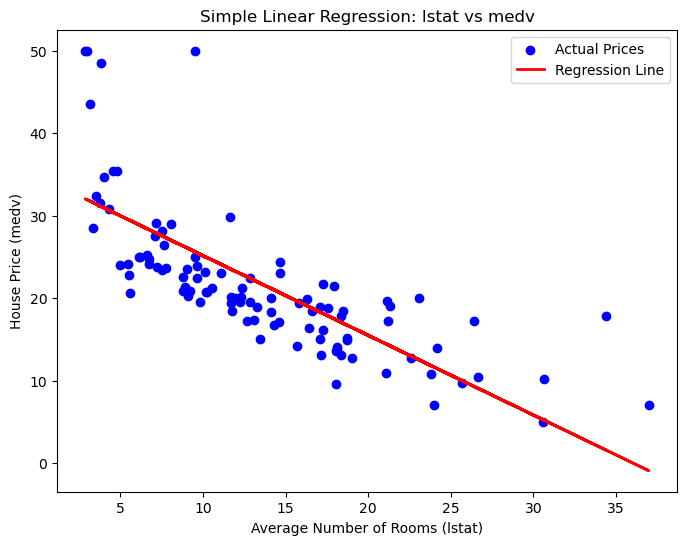

In [79]:
plt.figure(figsize=(8,6))

plt.scatter(X_test['lstat'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['lstat'], y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Average Number of Rooms (lstat)")
plt.ylabel("House Price (medv)")
plt.title("Simple Linear Regression: lstat vs medv")
plt.legend()
plt.show()

In [ ]:
X = data[['lstat']]   # Feature
y = data['medv']   # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

model = LinearRegression()

model.fit(X_train, y_train)

plt.figure(figsize=(8,6))

plt.scatter(X_test['lstat'], y_test, color='blue', label='Actual Prices')


plt.xlabel("Average Number of Rooms (lstat)")
plt.ylabel("House Price (medv)")
plt.title("Simple Linear Regression: lstat vs medv")
plt.legend()
plt.show()